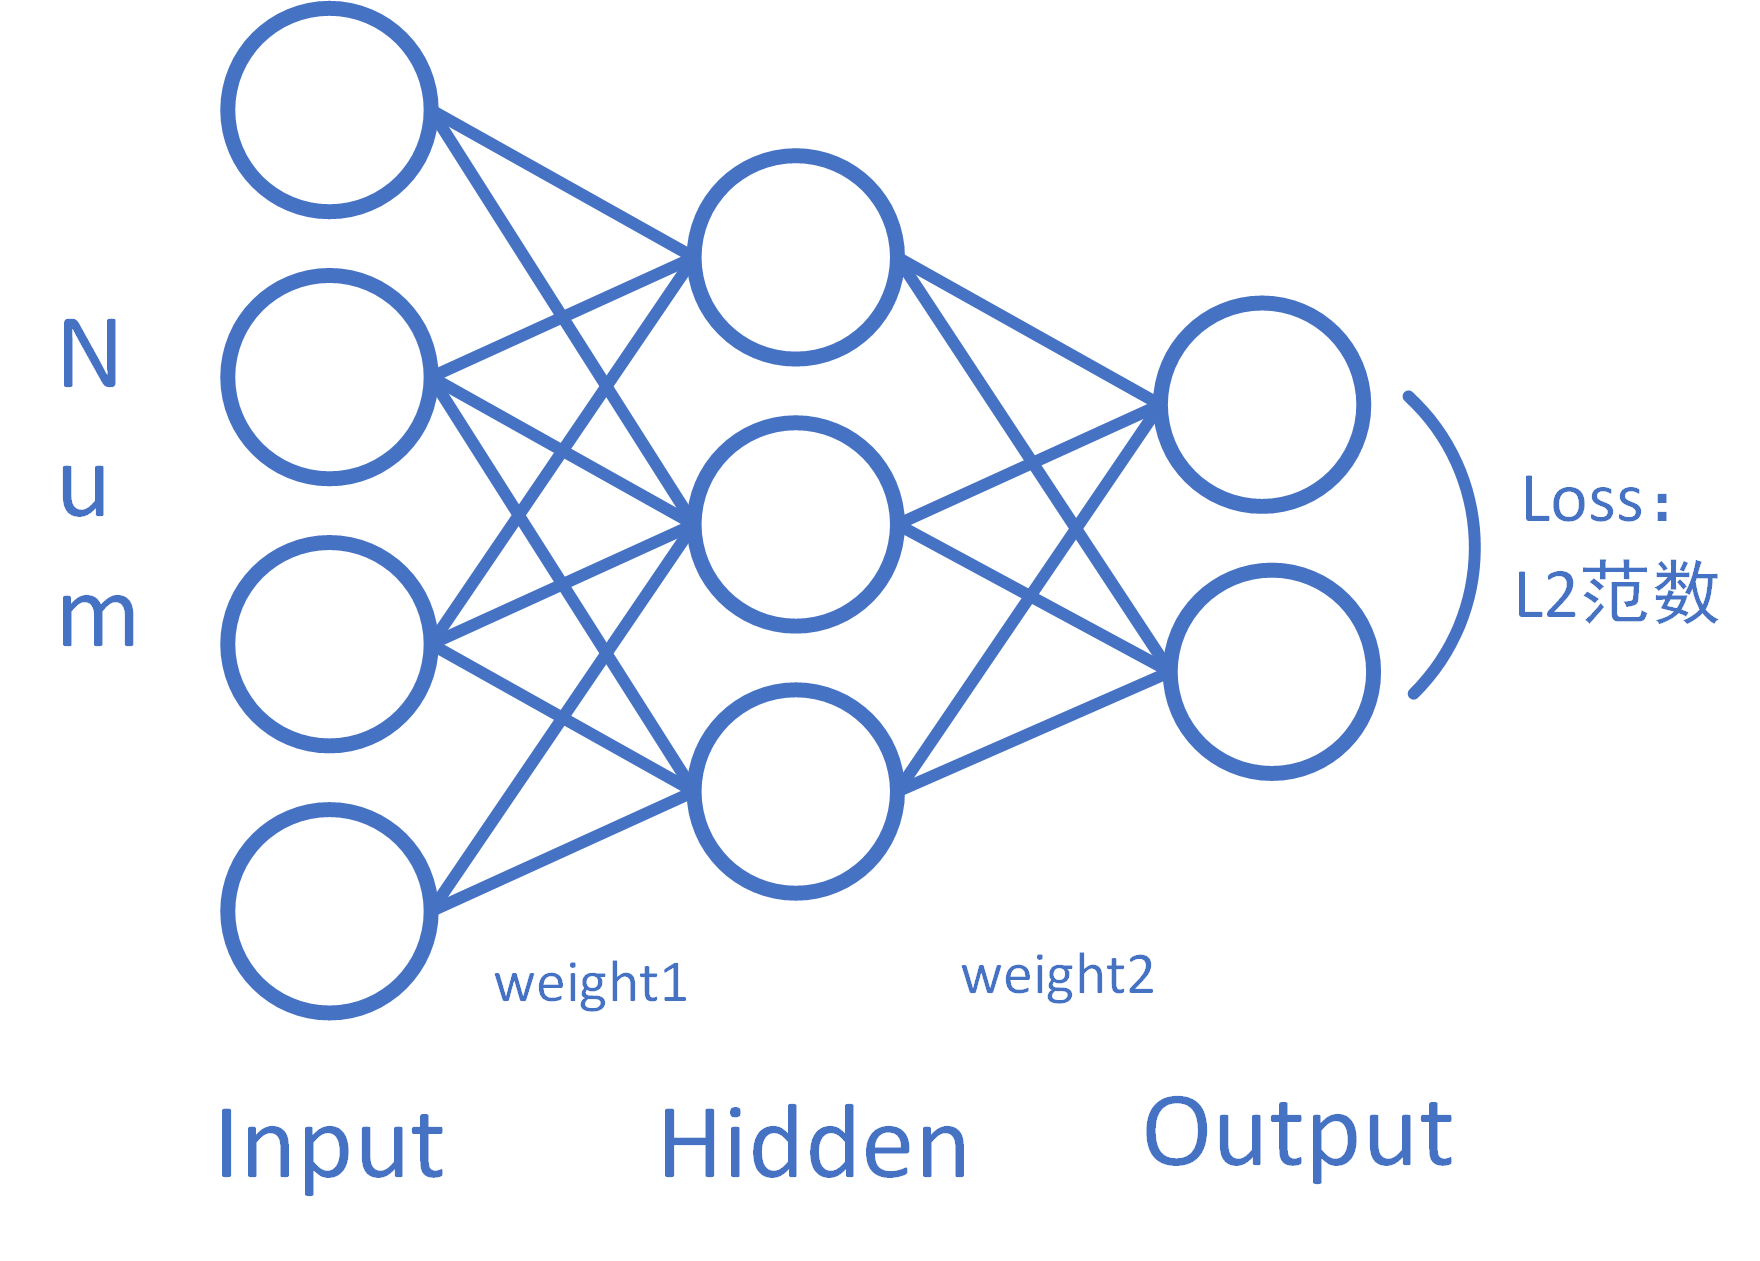

In [1]:
# 首先，我们使用numpy来实现我们的第一个DNN神经网络。
# Numpy是用于科学计算的通用框架，实现了通用的带有广播的矩阵运算，可以说是Python之所以这么受数据科学家欢迎的原因之一，成为了Python包里的基础设施，其paper于今年发表在nature：https://www.nature.com/articles/s41586-020-2649-2。
# 很多包都依赖于Numpy进行构建，包括深度学习框架诸如PyTorch Tensorflow等。
# 但由于其对计算图、梯度、自动微分等深度学习所需要使用的技术未做实现及优化，因此没有被深度学习广泛使用，但对于我们学习其原理已经足够。

# 引入所需的依赖包
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
# 以图片方式展示要实现的DNN网络结构
Image(filename = "dnn.png")


In [2]:
# 样本个数 输入维数 隐藏层维数 输出维数（在此问题中为最终分类种数）
Num, Input, Hidden, Output = 64, 1000, 100, 8
Step = int(Num / Output)

x = np.random.randn(Num, Input)

mean_labels = []
var_labels = []
# 随机生成服从八种均值和方差的正态分布数据，即八分类问题
for i in range(0, Num, Step):
    mean = np.random.random_sample()
    var = np.random.random_sample()
    mean_labels.append(mean)
    var_labels.append(var)
    x[i:i+Step, :]=mean * x[i:i+Step, :] + var


# 正态分布随机初始化中间层权重
w1 = np.random.randn(Input, Hidden)
w2 = np.random.randn(Hidden, Output)

# 生成数据x对应的one-hot标签y
rng = np.tile(np.eye(Output), (Step, 1))
rng.view('i8,'*Output).sort(axis=0)
y = np.flip(rng,0)
# 学习率以及循环总轮次
learning_rate = 1e-6
epochs = 5000

In [3]:
for t in range(epochs):
    # 前向过程
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 计算l2范数的loss值
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 反传梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 7824302.604057956
1 15319930.641281009
2 8351636.466512131
3 1447084.7056675297
4 963971.4757902167
5 794400.9302161336
6 685340.1276362592
7 604471.5330411161
8 539277.9954044686
9 485666.01913072256
10 440788.97070674796
11 402386.3963997822
12 369219.0528604785
13 340453.1821218177
14 315676.69846896
15 293953.5390586306
16 274648.21053593437
17 257525.20430999162
18 242131.12296521728
19 228286.23234898673
20 215686.26554582233
21 204187.33991911856
22 193588.28899986914
23 183849.24779327086
24 174895.63544823686
25 166728.59868542023
26 159180.75628280893
27 152228.25515612614
28 145763.20019067152
29 139743.97294826678
30 134147.6187072717
31 128933.36696123172
32 124089.22706547583
33 119554.80535343548
34 115303.36262537542
35 111296.86029630096
36 107524.2316929257
37 103981.21346801285
38 100637.87991752641
39 97462.08589752052
40 94448.10112522513
41 91611.46043327994
42 88918.65317118057
43 86357.69447495019
44 83913.74744955183
45 81581.06670725666
46 79349.57744207999


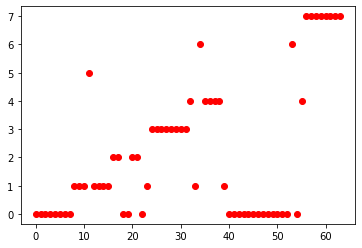

In [4]:
h = x.dot(w1)
h_relu = np.maximum(h, 0)
y_predict = h_relu.dot(w2)
# 最终预测结果
y_class =np.argmax(y_predict,axis=1)
plt.plot(y_class, 'ro')
